# Airline Passenger Satisfaction

**Objective**: Group customers according to their level of satisfaction using clusters and using the target variable as a performance evaluation metric.

*Dataset*: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

## Inicialization

### Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score

### Auxiliary Functions

In [6]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

### Visual Config

In [8]:
%matplotlib inline
plt.style.use('bmh')
sns.set(style='whitegrid')

## Data Visualization

In [10]:
train_set = pd.read_csv('train.csv')
val_test_set = pd.read_csv('test.csv')

val_set, test_set = train_test_split(val_test_set, test_size=0.5, random_state=42)

In [11]:
print('Train set length:', len(train_set))
print('Val set length:', len(val_set))
print('Test set length:', len(test_set))

Train set length: 103904
Val set length: 12988
Test set length: 12988


In [12]:
train_set.shape

(103904, 25)

In [16]:
train_set.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [17]:
train_set.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
val_set.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
test_set.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [23]:
train_set['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [27]:
train_set.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [29]:
train_set.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [31]:
val_set.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             34
satisfaction                          0
dtype: int64

In [33]:
test_set.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             49
satisfaction                          0
dtype: int64

In [35]:
median_value = train_set['Arrival Delay in Minutes'].median()

train_set['Arrival Delay in Minutes'] = train_set['Arrival Delay in Minutes'].fillna(median_value)
val_set['Arrival Delay in Minutes'] = val_set['Arrival Delay in Minutes'].fillna(median_value)
test_set['Arrival Delay in Minutes'] = test_set['Arrival Delay in Minutes'].fillna(median_value)

In [37]:
train_set['Arrival Delay in Minutes'].isnull().sum()

0

### Feature Analysis (train set)

#### Histplots

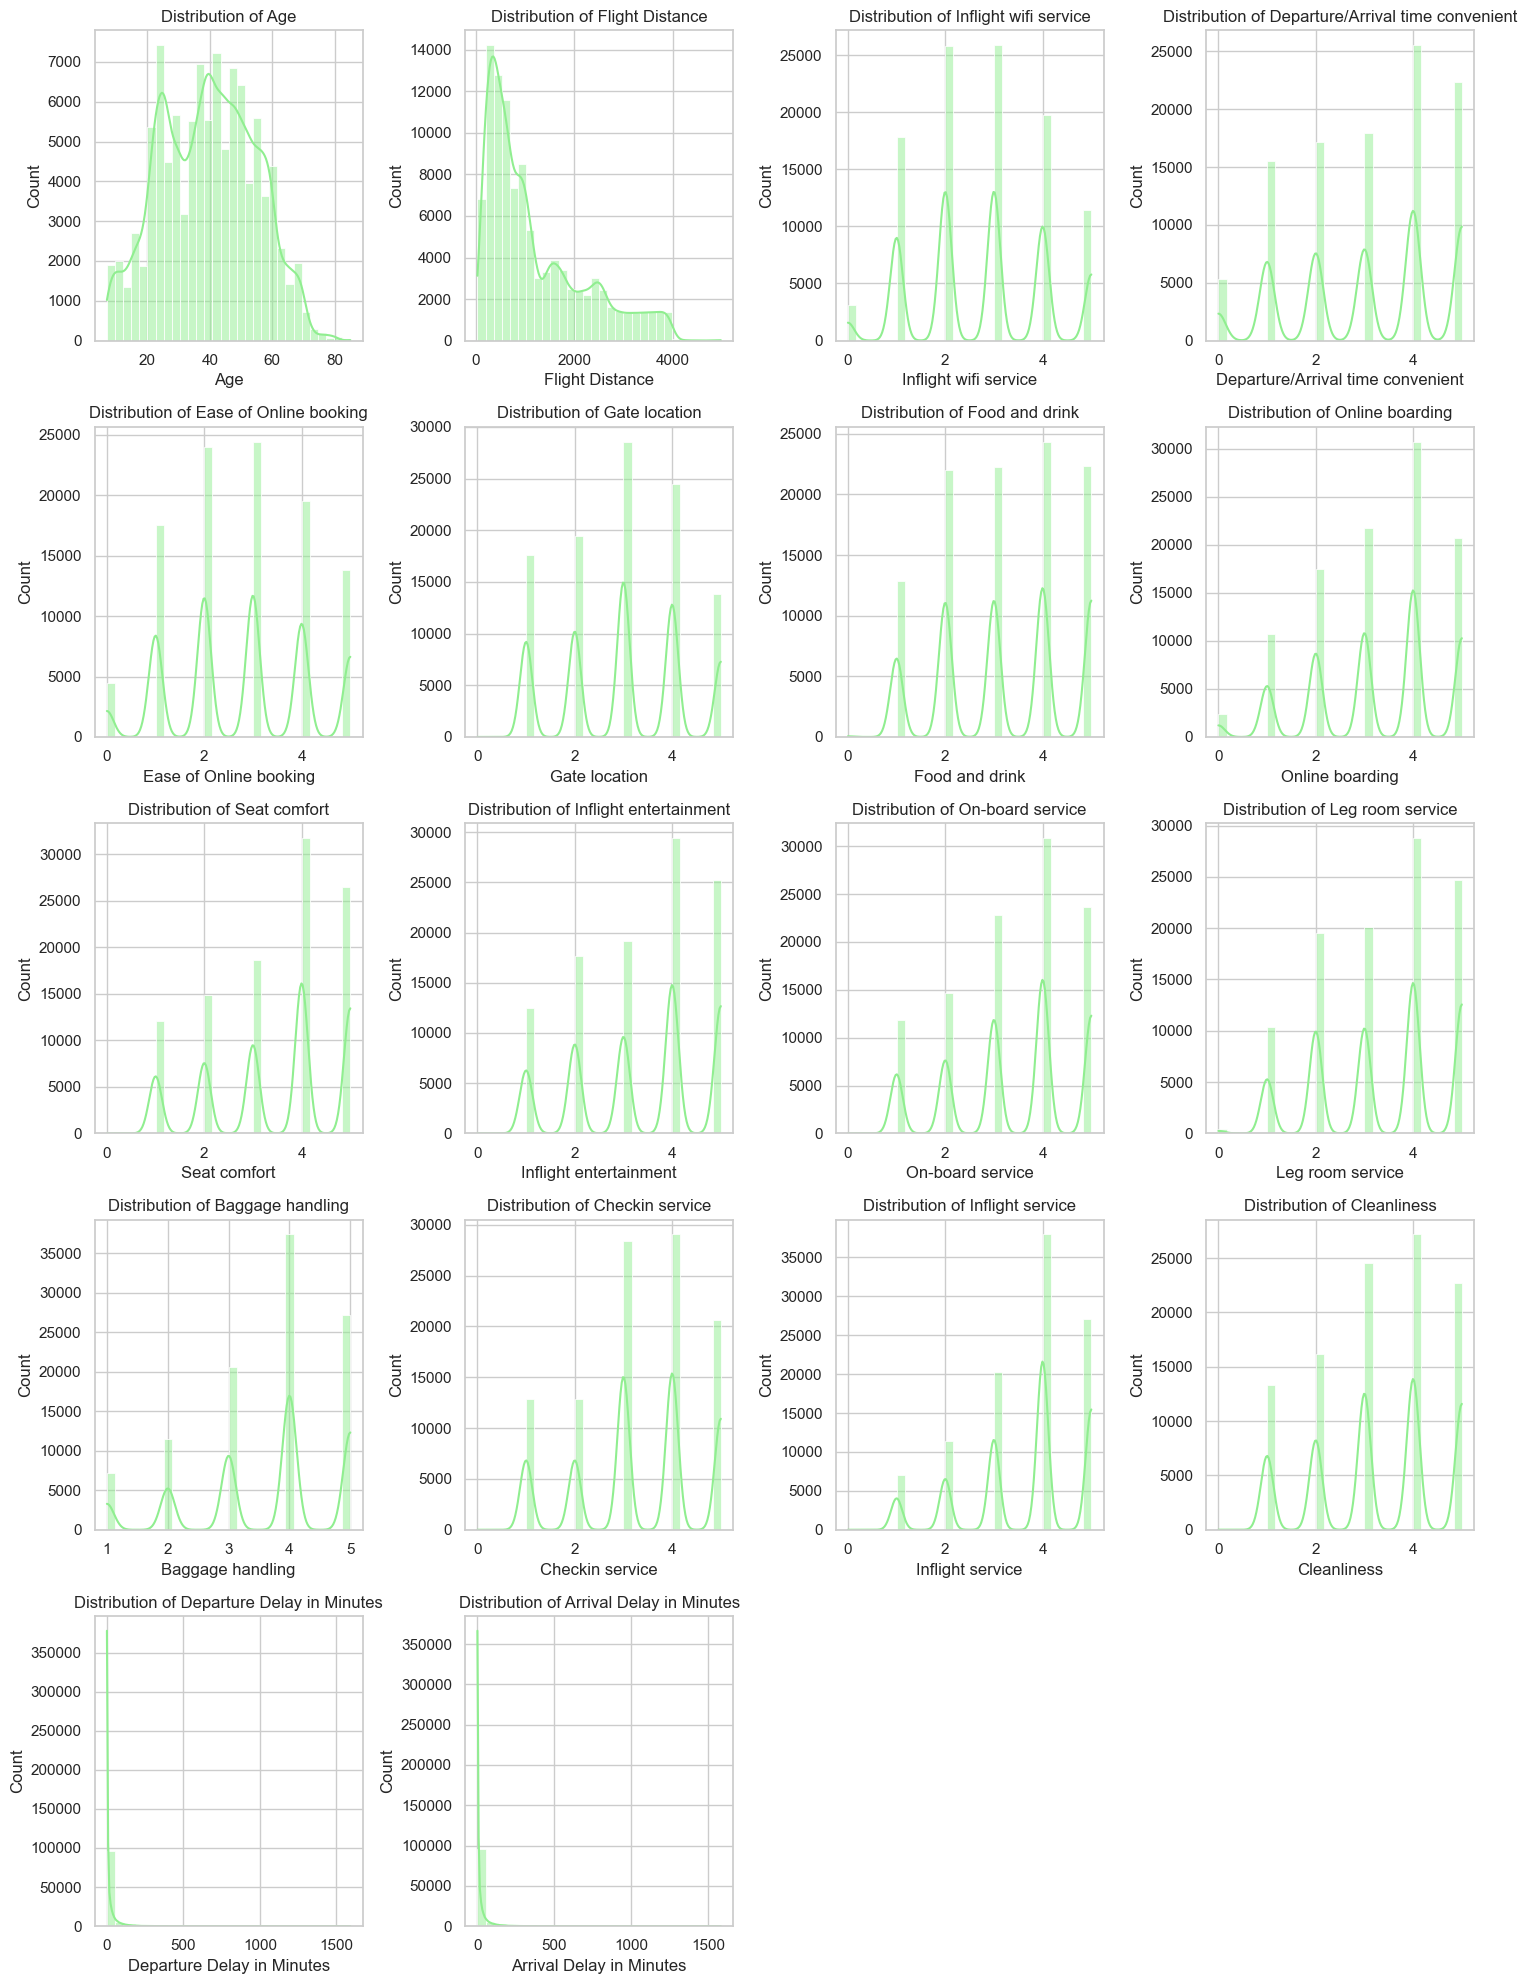

In [34]:
num_cols = train_set.select_dtypes(include=['float64', 'int64']).columns

cols = len(num_cols)
cols_per_row = 4
num_rows = int(np.ceil(cols / cols_per_row))

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(train_set[col], kde=True, bins=30, ax=axes[i], color='lightgreen')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Correlation Matrix

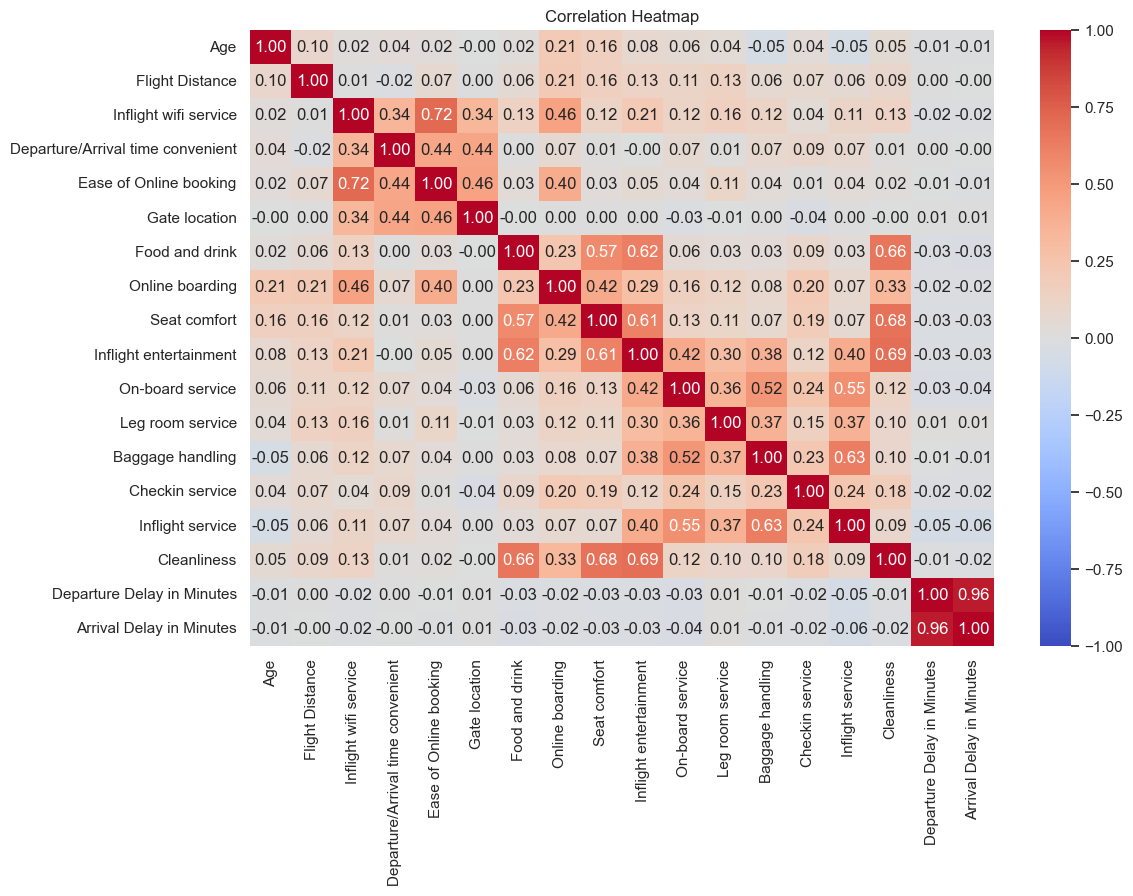

In [29]:
correlation_matrix = train_set[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

### Encoding and scaling

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identifying num and cat features
num_cols = train_set.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_set.select_dtypes(include=['object', 'category']).columns

# Creating transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols), # num scaling
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols) # cat codifying
    ],
    remainder='passthrough' # Keeping other columns if exist
)

# Applying transformations
train_set_prep = preprocessor.fit_transform(train_set)
val_set_prep = preprocessor.transform(val_set)
test_set_prep = preprocessor.transform(test_set)

# Getting new columns columnas names after OneHotEncoding
cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_columns = list(num_cols) + list(cat_columns)

train_set_prep = pd.DataFrame(train_set_prep, columns=all_columns)
val_set_prep = pd.DataFrame(val_set_prep, columns=all_columns)
test_set_prep = pd.DataFrame(test_set_prep, columns=all_columns)

In [44]:
train_set_prep

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,1.156436,1.305870,0.266393,0.074169,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,0.305848,-1.742292,-0.361375,-0.236313,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,0.305848,1.305870,-0.387532,-0.391554,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,0.305848,-0.980251,-0.099805,-0.158692,0.0,0.0,0.0,0.0,0.0,0.0
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,-0.544740,-0.218211,-0.387532,-0.391554,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.083680,-1.000307,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,...,-0.544740,-0.980251,-0.309061,-0.391554,0.0,1.0,0.0,1.0,0.0,0.0
103900,0.636478,1.160869,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,...,1.156436,0.543829,-0.387532,-0.391554,1.0,0.0,0.0,0.0,0.0,1.0
103901,-0.620561,0.807860,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,...,1.156436,0.543829,-0.204433,-0.029325,1.0,1.0,0.0,0.0,0.0,0.0
103902,-1.149840,-0.189991,-1.302646,-1.350954,-1.255895,1.583511,-1.656326,-1.667559,-1.849315,-1.769081,...,0.305848,-1.742292,-0.387532,-0.391554,0.0,1.0,0.0,1.0,0.0,0.0


In [47]:
train_set_prep.rename({'satisfaction_satisfied': 'satisfied'}, axis=1, inplace=True)
val_set_prep.rename({'satisfaction_satisfied': 'satisfied'}, axis=1, inplace=True)
test_set_prep.rename({'satisfaction_satisfied': 'satisfied'}, axis=1, inplace=True)

In [49]:
X_train, y_train = remove_labels(train_set_prep, 'satisfied')
X_val, y_val = remove_labels(val_set_prep, 'satisfied')
X_test, y_test = remove_labels(test_set_prep, 'satisfied')

### Dimensionality reduction with PCA

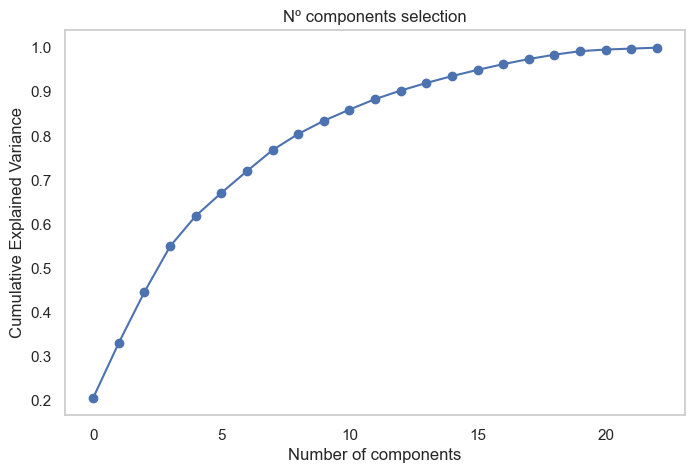

Optimal number: 17


In [52]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Visualising Cumulative Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Nº components selection')
plt.grid()
plt.show()

# Selecting number of components that explain, for instance, the 95% of variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number: {n_components}")

# Dimensionality Reduction
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Converting to Pandas Dataframe
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

### Visualising Data with a Pairplot

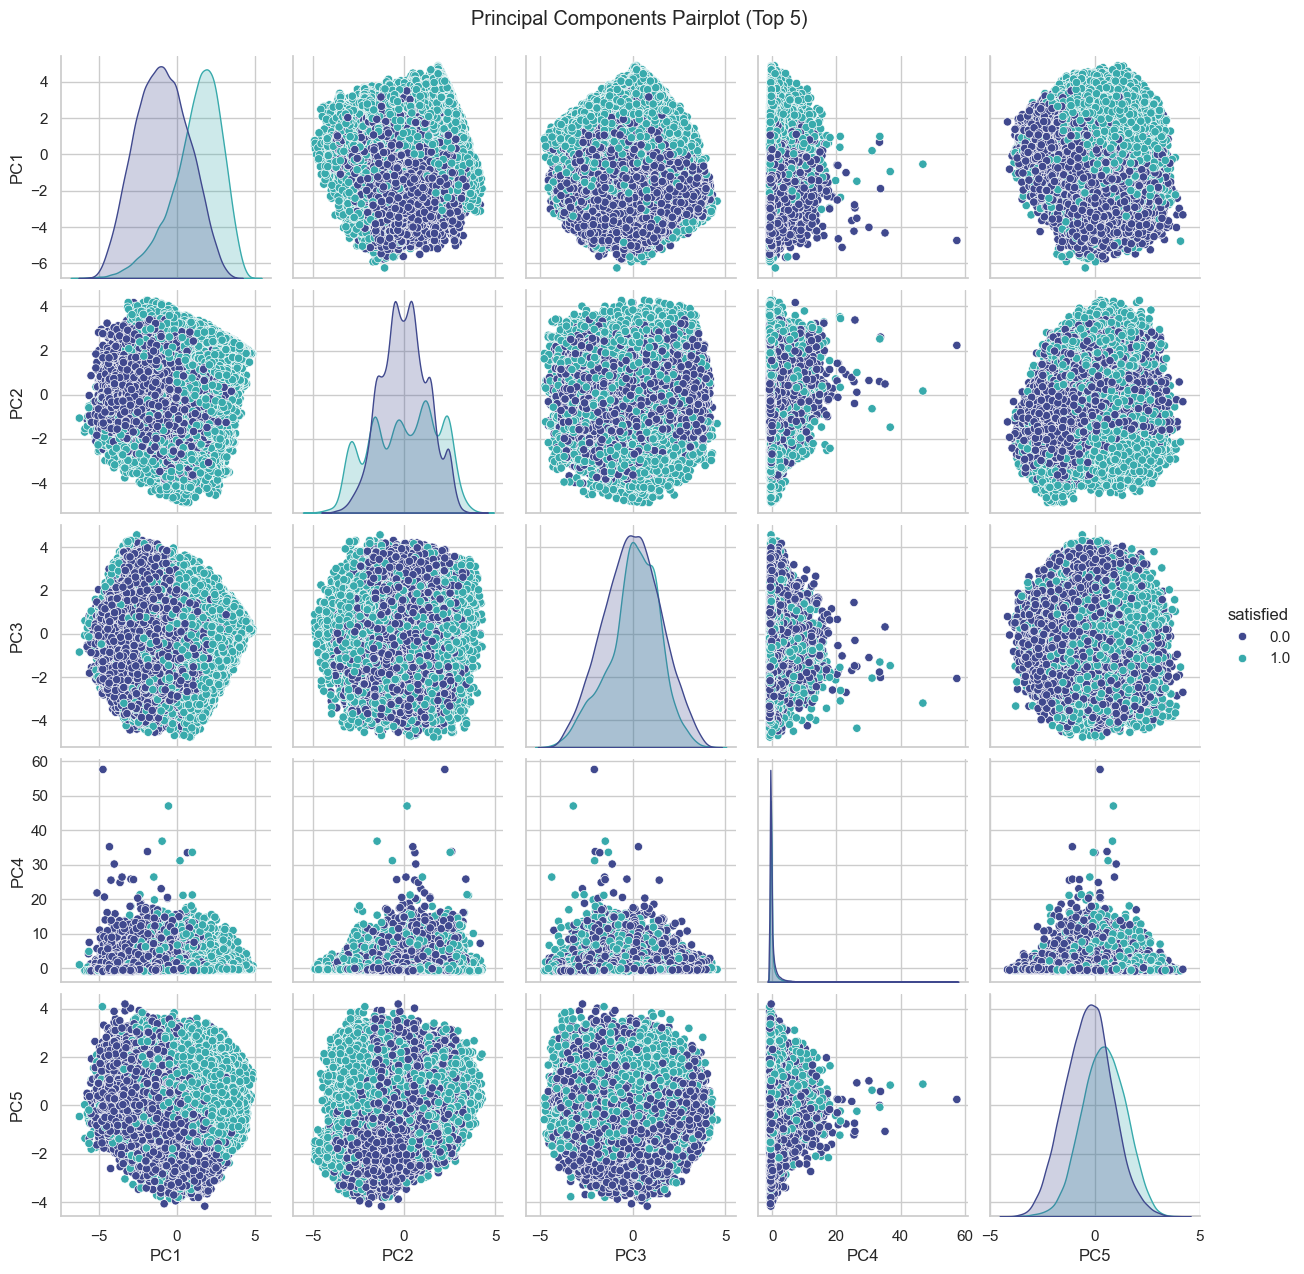

In [54]:
X_train_pca_df['satisfied'] = y_train.values

sns.pairplot(X_train_pca_df, vars=[f'PC{i+1}' for i in range(5)], hue='satisfied', palette='mako', diag_kind='kde')
plt.suptitle("Principal Components Pairplot (Top 5)", y=1.02)
plt.show()

## Model selection

### Training

#### K-Means

NOTE: Initial analysis with the Elbow Method and Silhouette Scores identified that 4 and 5 clusters are the optimal values for K-Means.
Therefore, the iterative computation of the Elbow Method has been eliminated to optimise run time.
Next, K-Means models with 4 and 5 clusters are trained to compare the results. After evaluating with Inertia, Silhouette and Calinski scores, and using y_train, plus seeing graphically the clusters distribution, 5 clusters seems to be the correct number of clusters.

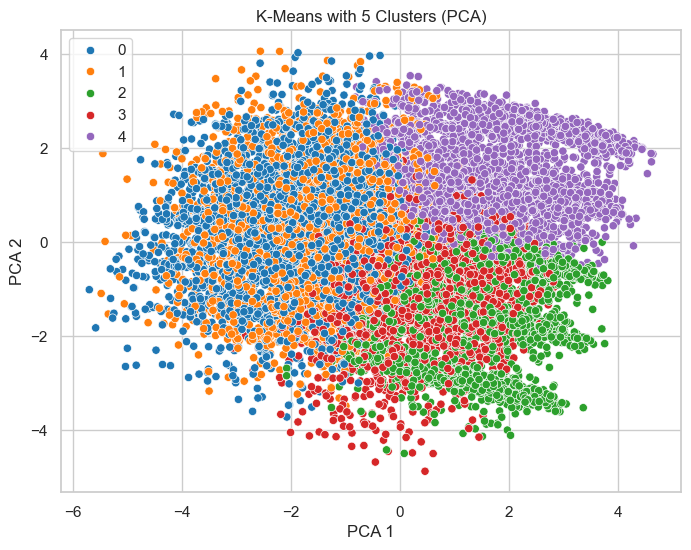

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_pca)
labels = kmeans.predict(X_val_pca)

# Visualising clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_val_pca[:, 0], 
    y=X_val_pca[:, 1], 
    hue=labels, 
    palette=sns.color_palette('tab10', 5),
    legend='full'
)
plt.title("K-Means with 5 Clusters (PCA)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [144]:
print('Silhouette score:', silhouette_score(X_val_pca, labels))
print('Calinski score:', calinski_harabasz_score(X_val_pca, labels))

Silhouette score: 0.12716893188077183
Calinski score: 1683.117736282244


#### DBSCAN

After using a "for loop" in order to find the best parameters of eps and min_samples, it turned out to be these ones the best parameters (even though, it could have been tried higher values of min_samples): eps=1.5 and min_samples=19. It is relevant to consider that this evaluation was done with silhouette, ari, ami and homogeneity scores.

In [146]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=25)
labels = dbscan.fit_predict(X_train_pca)

In [147]:
print('Silhouette score:', silhouette_score(X_train_pca, labels))
print('Calinski score:', calinski_harabasz_score(X_train_pca, labels))
print('Ari score:', adjusted_rand_score(y_train, labels))
print('Ami score:', adjusted_mutual_info_score(y_train, labels))
print('Homogeneity score:', homogeneity_score(y_train, labels))

Silhouette score: -0.2866357652087736
Calinski score: 710.5927431207966
Ari score: 0.20242565690808065
Ami score: 0.24420724925717366
Homogeneity score: 0.2132398955338955


#### Gaussian Mixture

After using a "for loop" in order to find the best parameters of n_components and covariance_type, this was the final parameters: n_components=3, covariance_type='spherical'.

In [67]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='spherical', random_state=42)
gmm.fit(X_train_pca)
labels = gmm.predict(X_val_pca)

In [110]:
print('Silhouette score:', silhouette_score(X_val_pca, labels))
print('Calinski score:', calinski_harabasz_score(X_val_pca, labels))

Silhouette score: 0.12716893188077183
Calinski score: 1683.117736282244


### Evaluating models with y_train

In [97]:
def evaluate_clustering(model_labels, true_labels, dataset=None):
    print("Model Evaluation:")
    print(f"  - Silhouette Score: {silhouette_score(dataset, model_labels):.4f}" if len(set(model_labels)) > 1 else "  - Silhouette Score: N/A (A unique cluster)")
    print(f"  - Adjusted Rand Index: {adjusted_rand_score(true_labels, model_labels):.4f}")
    print(f"  - Adjusted Mutual Info Score: {adjusted_mutual_info_score(true_labels, model_labels):.4f}")
    print(f"  - Homogeneity Score: {homogeneity_score(true_labels, model_labels):.4f}")

In [102]:
# K-Means
print("K-Means:")
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_pca)
evaluate_clustering(kmeans_labels, y_train, X_train_pca)

# DBSCAN
print("\nDBSCAN:")
dbscan = DBSCAN(eps=1.5, min_samples=25)
dbscan_labels = dbscan.fit_predict(X_train_pca)
evaluate_clustering(dbscan_labels, y_train, X_train_pca)

# Gaussian Mixture Models (GMM)
print("\nGaussian Mixture Model:")
gmm = GaussianMixture(n_components=3, covariance_type='spherical', random_state=42)
gmm_labels = gmm.fit_predict(X_train_pca)
evaluate_clustering(gmm_labels, y_train, X_train_pca)

K-Means:
Model Evaluation:
  - Silhouette Score: 0.1167
  - Adjusted Rand Index: 0.1555
  - Adjusted Mutual Info Score: 0.1821
  - Homogeneity Score: 0.3033

DBSCAN:
Model Evaluation:
  - Silhouette Score: -0.2866
  - Adjusted Rand Index: 0.2024
  - Adjusted Mutual Info Score: 0.2442
  - Homogeneity Score: 0.2132

Gaussian Mixture Model:
Model Evaluation:
  - Silhouette Score: 0.1257
  - Adjusted Rand Index: 0.1393
  - Adjusted Mutual Info Score: 0.1281
  - Homogeneity Score: 0.1651


### Searching for outliers with Isolation Forest

By using a for loop, it was found these ones are the best parameters for contamination=0.15 and max_samples=1.0

In [107]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=1500, contamination=0.15, max_samples=1.0, random_state=42)
iso_forest.fit(X_train_pca)

# Predictions: -1 are outliers
anomalies_train = iso_forest.predict(X_train_pca)
print(f"Outliers detected in X_train: {np.sum(anomalies_train == -1)}")

anomalies_val = iso_forest.predict(X_val_pca)
print(f"Outliers detected in X_val: {np.sum(anomalies_val == -1)}")

anomalies_test = iso_forest.predict(X_test_pca)
print(f"Outliers detected in X_test: {np.sum(anomalies_test == -1)}")

Outliers detected in X_train: 15586
Outliers detected in X_val: 1999
Outliers detected in X_test: 1979


In [108]:
X_train_clean = X_train_pca[anomalies_train == 1]
X_train_anomalous = X_train_pca[anomalies_train == -1]

X_val_clean = X_val_pca[anomalies_val == 1]
X_val_anomalous = X_val_pca[anomalies_val == -1]

X_test_clean = X_test_pca[anomalies_test == 1]
X_test_anomalous = X_test_pca[anomalies_test == -1]

In [134]:
X_train_clean_mask = anomalies_train != -1
y_train_clean = y_train.iloc[np.where(X_train_clean_mask)[0]].reset_index(drop=True)

### Training the same models with X_train_clean

In [140]:
# K-Means
print("K-Means:")
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_clean)
evaluate_clustering(kmeans_labels, y_train_clean, X_train_clean)

# DBSCAN
print("\nDBSCAN:")
dbscan = DBSCAN(eps=1.5, min_samples=25)
dbscan_labels = dbscan.fit_predict(X_train_clean)
evaluate_clustering(dbscan_labels, y_train_clean, X_train_clean)

# Gaussian Mixture Models (GMM)
print("\nGaussian Mixture Model:")
gmm = GaussianMixture(n_components=3, covariance_type='spherical', random_state=42)
gmm_labels = gmm.fit_predict(X_train_clean)
evaluate_clustering(gmm_labels, y_train_clean, X_train_clean)

K-Means:
Model Evaluation:
  - Silhouette Score: 0.1312
  - Adjusted Rand Index: 0.1342
  - Adjusted Mutual Info Score: 0.1447
  - Homogeneity Score: 0.2306

DBSCAN:
Model Evaluation:
  - Silhouette Score: -0.2716
  - Adjusted Rand Index: 0.2656
  - Adjusted Mutual Info Score: 0.2883
  - Homogeneity Score: 0.2629

Gaussian Mixture Model:
Model Evaluation:
  - Silhouette Score: 0.1112
  - Adjusted Rand Index: 0.2514
  - Adjusted Mutual Info Score: 0.1869
  - Homogeneity Score: 0.2361


**So, DBSCAN is the final model, with an important increase with X_train_clean**

## Conclusion

Of the models evaluated, DBSCAN stood out as the most suitable for the dataset clustering, despite its negative Silhouette Score. Although this metric reflects a low separation between clusters, the Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI) and Homogeneity Score metrics demonstrated a higher alignment between the clusters formed and the structure of the data.

##### Main observations:

- Anomaly removal: applying Isolation Forest improved the performance of DBSCAN, increasing metrics such as ARI (from 0.2024 to 0.2656) and AMI (from 0.2442 to 0.2883).
- Adaptability of DBSCAN: With *eps=1.5* and *min_samples=25*, DBSCAN captured non-spherical patterns in the data and handled noise effectively, outperforming K-Means and Gaussian Mixture in its alignment with the satisfaction variable.

##### Reflection:
The project showed the importance of pre-processing, careful selection of hyperparameters and evaluation with multiple metrics. Despite its negative Silhouette Score, DBSCAN offered the best balance and proved to be the most robust for this analysis.